In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


## Data Cleaning

In [4]:
df.shape

(177866, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.duplicated().sum()

0

## EDA and Visualization

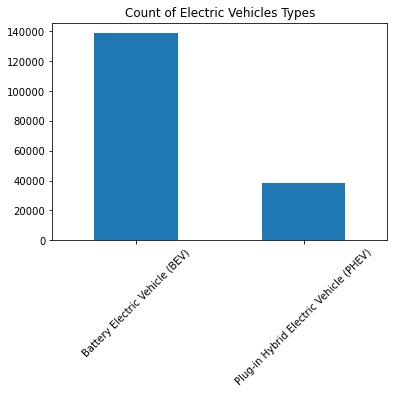

In [9]:
df['Electric Vehicle Type'].value_counts().plot(kind='bar')
plt.title ('Count of Electric Vehicles Types')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

In [10]:
#Top 20 Electric Vehicle Makes by Number of Electric Vehicels.
ev_counts_by_make=df['Make'].value_counts().nlargest(10)

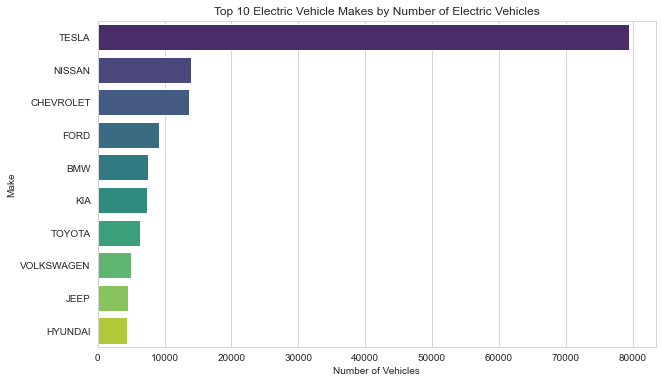

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=ev_counts_by_make.values,y=ev_counts_by_make.index,palette="viridis")
plt.title('Top 10 Electric Vehicle Makes by Number of Electric Vehicles',fontsize=12)
plt.xlabel('Number of Vehicles',fontsize=10)
plt.ylabel('Make',fontsize=10)
plt.show()

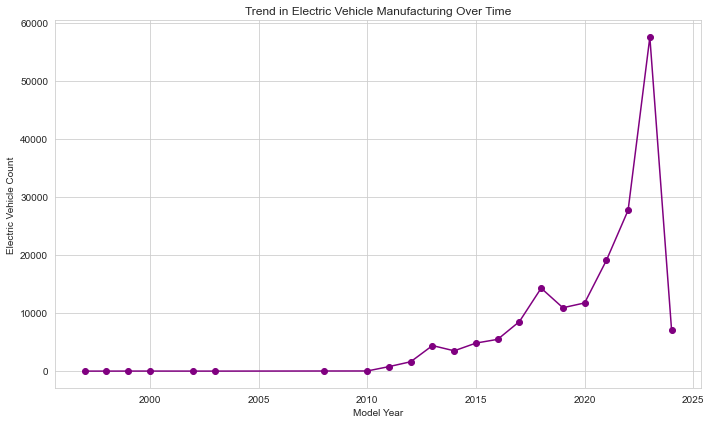

In [12]:
#EV Adoption Over Time

#sns.set_style("whitegrid")
#ev_adoption_over_time=df['Model Year'].value_counts().sort_index()
#plt.figure(figsize=(14,7))
#sns.lineplot(x=ev_adoption_over_time.index,y=ev_adoption_over_time.values, marker='o',color='Purple')
#plt.title('EV Adoption Over Time',fontsize=18)
#plt.xlabel('Model Year',fontsize=14)
#plt.ylabel('Number of EV Registrations',fontsize=14)
#plt.show()

yearly_counts= df.groupby('Model Year').size().reset_index(name='Electric Vehicle Count')

plt.figure(figsize=(10,6))
plt.plot(yearly_counts['Model Year'],yearly_counts['Electric Vehicle Count'],marker='o',color='Purple')
plt.title('Trend in Electric Vehicle Manufacturing Over Time')
plt.xlabel('Model Year')
plt.ylabel('Electric Vehicle Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
 #it started to increase in early 2010s, which accelerates further into the 2020.The recent years showing an exponential growth in EV adoption, which means it is becoming more popular.

In [14]:
#Top 20 Counties by Electric Vehicle Counts
ev_count_distribution=df.groupby('County')['VIN (1-10)'].count().reset_index().sort_values(by='VIN (1-10)',ascending=False)
top_ev_counties = ev_count_distribution.head(20)


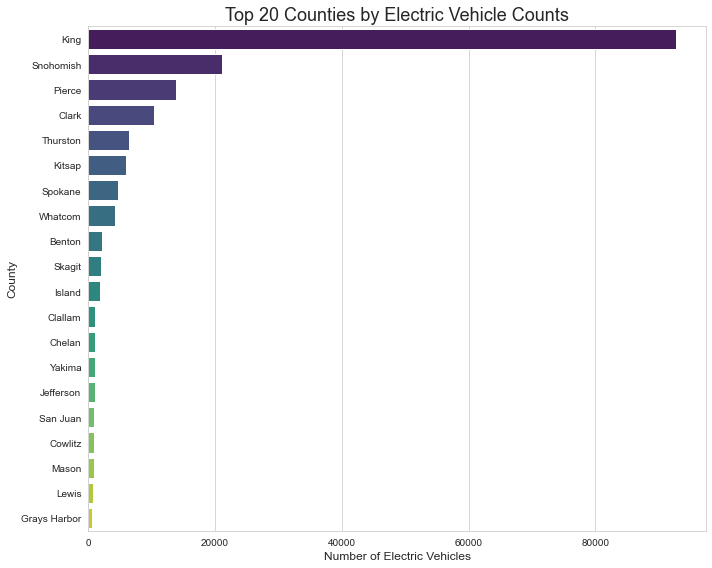

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='VIN (1-10)', y= 'County', data = top_ev_counties,palette='viridis')

#plt.bar(top_ev_counties['County'], top_ev_counties['VIN (1-10)'], color='skyblue')
plt.title('Top 20 Counties by Electric Vehicle Counts',fontsize=18)
plt.xlabel('Number of Electric Vehicles',fontsize=12)
plt.ylabel('County',fontsize =12)
plt.tight_layout()
plt.show()

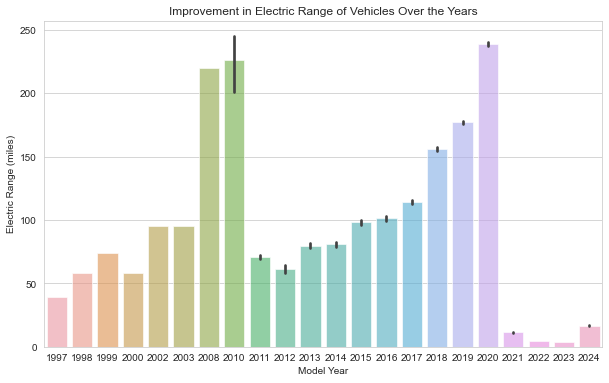

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Model Year', y='Electric Range', alpha=0.6)

plt.title('Improvement in Electric Range of Vehicles Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')

#sns.regplot(data=df, x='Model Year', y='Electric Range', scatter=False, color='Purple')

plt.show()

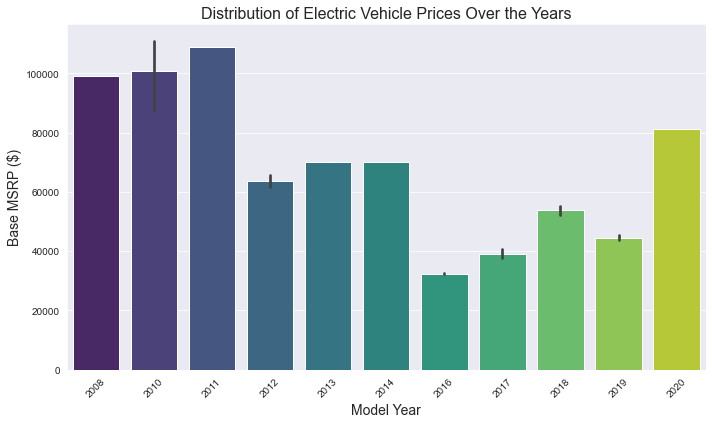

In [24]:
# Filtering out rows where Base MSRP is zero or high
filtered_df = df[(df['Base MSRP'] > 0) & (df['Base MSRP'] < 200000)]

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x='Model Year', y='Base MSRP', palette="viridis")
plt.title('Distribution of Electric Vehicle Prices Over the Years', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Base MSRP ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
top_makes = filtered_df['Make'].value_counts().nlargest(10).index
filtered_top_makes_df = filtered_df[filtered_df['Make'].isin(top_makes)]

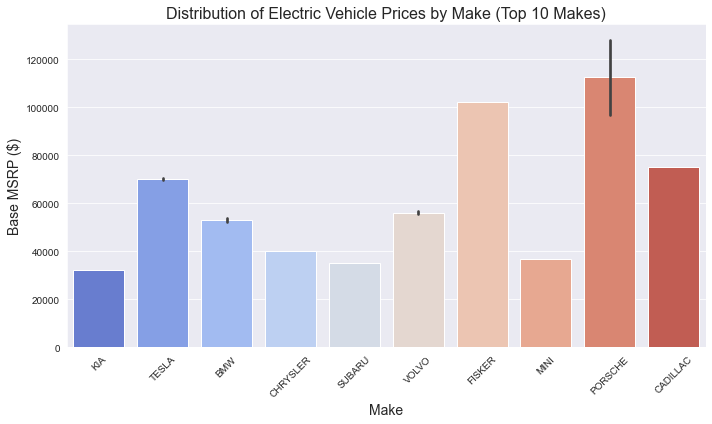

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=filtered_top_makes_df, x='Make', y='Base MSRP', palette="coolwarm")
plt.title('Distribution of Electric Vehicle Prices by Make (Top 10 Makes)', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Base MSRP ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
district_counts = df.groupby('Legislative District')['DOL Vehicle ID'].count().reset_index()

district_counts_sorted = district_counts.sort_values(by='DOL Vehicle ID', ascending=False)

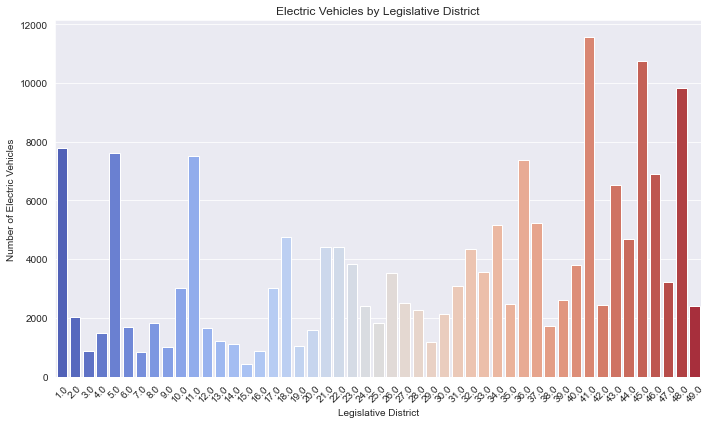

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Legislative District', y='DOL Vehicle ID', data=district_counts_sorted,
            palette='coolwarm')
plt.title('Electric Vehicles by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()